# Neural net based on Keras
(1 hidden layer) 

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [3]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255.0

In [4]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [5]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2539 - acc: 0.9270
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1045 - acc: 0.9690
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0689 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0500 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0370 - acc: 0.9888


In [6]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 0s 32us/step
0.070548699757 0.9791


## IMDB classification

### STEP 1:
Load raw IMDB dataset

In [23]:
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.datasets import imdb

(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = imdb.load_data(num_words=10000)

# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

17465344/17464789 [==============================] - 1s 0us/step


### STEP 2:
Preprocessing training data

In [26]:
import numpy as np
def vectorize_seqs(seqs, dim=10000):
    res = np.zeros( (len(seqs), dim) )
    for i, seq in enumerate(seqs):
        res[i, seq] = 1
    return res

x_train = vectorize_seqs(x_train_raw)
x_test = vectorize_seqs(x_test_raw)

y_train = np.asarray(y_train_raw).astype('float32')
y_test = np.asarray(y_test_raw).astype('float32')

## STEP 3:
Build neural network

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16,  activation='relu'))
model.add(layers.Dense(16,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
          

In [36]:
model.fit(x_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
25000/25000 [==============================] - 2s 94us/step - loss: 0.0355 - acc: 0.9898
Epoch 2/10
25000/25000 [==============================] - 2s 95us/step - loss: 0.0275 - acc: 0.9926
Epoch 3/10
25000/25000 [==============================] - 2s 95us/step - loss: 0.0203 - acc: 0.9943
Epoch 4/10
25000/25000 [==============================] - 2s 94us/step - loss: 0.0147 - acc: 0.9962
Epoch 5/10
25000/25000 [==============================] - 2s 94us/step - loss: 0.0109 - acc: 0.9978
Epoch 6/10
25000/25000 [==============================] - 2s 95us/step - loss: 0.0089 - acc: 0.9983
Epoch 7/10
25000/25000 [==============================] - 2s 95us/step - loss: 0.0066 - acc: 0.9987
Epoch 8/10
25000/25000 [==============================] - 2s 95us/step - loss: 0.0047 - acc: 0.9988
Epoch 9/10
25000/25000 [==============================] - 2s 95us/step - loss: 0.0037 - acc: 0.9990
Epoch 10/10
25000/25000 [==============================] - 2s 95us/step - loss: 0.0036 - acc: 0.9990

In [37]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 63us/step


[1.3151868843960761, 0.84616000000000002]

# Using tensorflow.keras instead

In [18]:
import tensorflow as tf

In [26]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [22]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.2616 - acc: 0.9242     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.1032 - acc: 0.9690     
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 0.0683 - acc: 0.9795     
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 0.0498 - acc: 0.9855     
Epoch 5/5
60000/60000 [==============================] - 2s - loss: 0.0369 - acc: 0.9890     


In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

 8736/10000 [=========================>....] - ETA: 0s

In [24]:
test_acc

0.98040000000000005

In [40]:
# (HP, ATK, DEF, GOLD, EXP)
strLst = """(50, 20, 1, 1, 1, "绿头怪")
(70, 15, 2, 2, 2, "红头怪") 
(100, 20, 5, 3, 3, "小蝙蝠") 
(110, 25, 5, 5, 4, "骷髅人") 
(200, 35, 10, 5, 5, "青头怪") 
(150, 40, 20, 8, 6, "骷髅士兵") 
(125, 50, 25, 10, 7, "初级法师") 
(150, 65, 30, 10, 8, "大蝙蝠") 
(300, 75, 45, 13, 10, "兽面人") 
(400, 90, 50, 15, 12, "骷髅队长") 
(500, 115, 65, 15, 15, "石头怪人") 
(250, 120, 70, 20, 17, "麻衣法师") 
(450, 150, 90, 22, 19, "初级卫兵") 
(550, 160, 90, 25, 20, "红蝙蝠") 
(100, 200, 110, 30, 25, "高级法师") 
(700, 250, 125, 32, 30, "怪王") 
(1300, 300, 150, 40, 35, "白衣武士") 
(850, 350, 200, 45, 40, "金卫士") 
(500, 400, 260, 47, 45, "红衣法师") 
(900, 450, 330, 50, 50, "兽面武士") 
(1250, 500, 400, 55, 55, "冥卫兵") 
(1500, 560, 460, 60, 60, "高级卫兵") 
(1200, 620, 520, 65, 75, "双手剑士") 
(2000, 680, 590, 70, 65, "冥战士") 
(900, 750, 650, 77, 70, "金队长") 
(1500, 830, 730, 80, 70, "灵法师") 
(2500, 900, 850, 84, 75, "冥队长") 
(1200, 980, 900, 88, 75, "灵武士") 
(3100, 1150, 1050, 92, 80, "影子战士") 
(15000, 1000, 1000, 100, 100, "红衣魔王") 
(20000, 1333, 1333, 133, 133, "红衣魔王") 
(30000, 1700, 1500, 250, 220, "冥灵魔王")       
(45000, 2550, 2250, 312, 275, "冥灵魔王") 
(3333, 1200, 1133, 112, 100, "冥队长") 
(1800, 1306, 1200, 117, 100, "灵武士") 
(2400, 980, 900, 88, 75, "灵武士") 
(2000, 1106, 730, 106, 93, "灵法师") 
(1500, 830, 730, 132, 116, "灵法师") 
(60000, 3400, 3000, 390, 343, "冥灵魔王") 
(99999, 5000, 4000, 0, 0, "血影") 
(99999, 9999, 5000, 0, 0, "魔龙")"""

In [89]:
enemyDict = {}
for line in strLst.split('\n'):
    lineLst = line.strip()[1:-1].split(",")
    enemyDict[lineLst[5].strip()[1:-1]] = {
        "HP":int(lineLst[0]),
        "ATK":int(lineLst[1]),
        "DEF":int(lineLst[2]),
        "GOLD":int(lineLst[3]),
        "EXP":int(lineLst[4])
    }

In [126]:
import math
def dH(a1, d1, *enemyInfo):
    if len(enemyInfo) == 1 and enemyInfo[0] in enemyDict:
        dct = enemyDict[enemyInfo[0]]
        h2, a2, d2 = dct["HP"], dct["ATK"], dct["DEF"]
    elif len(enemyInfo) == 3:
        h2, a2, d2 = enemyInfo
    else:
        print("Enemy info incorrect!")
        return None
    if a1 <= d2:
        return -1
    elif:
        
    else:
        return math.floor(h2/(a1-d2)) * (a2-d1)

print(dH(5001, 0, "魔龙"))

999890001


In [88]:
enemyInfo = ["魔龙"]
len(enemyInfo) == 1 and enemyInfo[0] in enemyDict

True

In [120]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

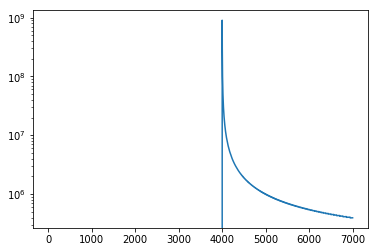

In [146]:
s = 7000
atk1 = np.linspace(1,s,s)
def1 = 1 - atk1
dHP = np.zeros([s,1])
for i in range(s):
    dHP[i] = dH(atk1[i],def1[i], "血影")
plt.semilogy(atk1,dHP)
plt.show()

In [178]:
for enemyName in enemyDict:
    print(enemyName + " : " + str(dH(1500, 197, enemyName)))

绿头怪 : 0
红头怪 : 0
小蝙蝠 : 0
骷髅人 : 0
青头怪 : 0
骷髅士兵 : 0
初级法师 : 0
大蝙蝠 : 0
兽面人 : 0
骷髅队长 : 0
石头怪人 : 0
麻衣法师 : 0
初级卫兵 : 0
红蝙蝠 : 0
高级法师 : 0
怪王 : 0
白衣武士 : 0
金卫士 : 0
红衣法师 : 0
兽面武士 : 0
冥卫兵 : 303
高级卫兵 : 363
双手剑士 : 423
冥战士 : 966
金队长 : 553
灵法师 : 633
冥队长 : 9027
灵武士 : 3132
影子战士 : 5718
红衣魔王 : 135184
冥灵魔王 : -1
血影 : -1
魔龙 : -1


In [150]:
for enemyName in enemyDict:
    print(enemyName)

绿头怪
红头怪
小蝙蝠
骷髅人
青头怪
骷髅士兵
初级法师
大蝙蝠
兽面人
骷髅队长
石头怪人
麻衣法师
初级卫兵
红蝙蝠
高级法师
怪王
白衣武士
金卫士
红衣法师
兽面武士
冥卫兵
高级卫兵
双手剑士
冥战士
金队长
灵法师
冥队长
灵武士
影子战士
红衣魔王
冥灵魔王
血影
魔龙
